**Prbolem Statement:**
Take a small image dataset (400-500 images with at least 224X224X3 pixels or more). The dataset must have 4 to 5 classes of images. Find the final features of those images using pre-trained ResNet-101. Take one image from each class, then find the ten nearest neighbors of that image (using the final image embedding)  from all the images. Do the same for ZFNet and compare the results. 

**Group members list**


*   **Member 1:** Md Shawmoon Azad (1912374042)  
*   **Member 2:**
*   **Member 3:**
*   **Member 4:**
*   **Member 5:**







**Summarry of the results:** 

# Installing Libraires

In [ ]:
!pip install hub
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 404 kB 4.8 MB/s 
     |████████████████████████████████| 132 kB 49.6 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 6.7 MB 52.0 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 10.3 MB 56.1 MB/s 
     |████████████████████████████████| 140 kB 59.7 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 132 kB 61.1 MB/s 
     |████████████████████████████████| 127 kB 59.5 MB/s 
  Created wheel for deeplake: filename=deeplake-3.1.5-py3-none-any.whl size=489432 sha256=08233fa98c12cc9637f7848c674a444c3388fe5d2481e3163b35688183a871d9
  Stored in directory: /root/.cache/pip/wheels/e7/ca/54/d118b254f85536e95e27056f1381b7bd43a2f46b208869cf66
Successfully built deeplake
  Attempting uninstall: urllib3
    F

# Importing Libraries

In [ ]:
import numpy as np
import hub
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
from torchsummary import summary
import torchvision.models as models
import glob
from tqdm import tqdm
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset from kaggle using API

In [ ]:
!export KAGGLE_USERNAME="shawmoonazad" && export KAGGLE_KEY="6530c17ae11c9052992be6398eed70e3" && mkdir -p data && cd data && kaggle datasets download -d eward96/dog-breed-images && unzip -n dog-breed-images.zip && rm dog-breed-images.zip

 87% 80.0M/91.7M [00:00<00:00, 120MB/s] 
100% 91.7M/91.7M [00:00<00:00, 104MB/s]
Archive:  dog-breed-images.zip
  inflating: bernese_mountain_dog/bernese1.jpg  
  inflating: bernese_mountain_dog/bernese10.jpg  
  inflating: bernese_mountain_dog/bernese100.jpg  
  inflating: bernese_mountain_dog/bernese11.jpg  
  inflating: bernese_mountain_dog/bernese12.jpg  
  inflating: bernese_mountain_dog/bernese13.jpg  
  inflating: bernese_mountain_dog/bernese14.jpg  
  inflating: bernese_mountain_dog/bernese15.jpg  
  inflating: bernese_mountain_dog/bernese16.jpg  
  inflating: bernese_mountain_dog/bernese17.jpg  
  inflating: bernese_mountain_dog/bernese18.jpg  
  inflating: bernese_mountain_dog/bernese19.jpg  
  inflating: bernese_mountain_dog/bernese2.jpg  
  inflating: bernese_mountain_dog/bernese20.jpg  
  inflating: bernese_mountain_dog/bernese21.jpg  
  inflating: bernese_mountain_dog/bernese22.jpg  
  inflating: bernese_mountain_dog/bernese23.jpg  
  inflating: bernese_mountain_dog/berne

# Exploratory Data Analysis

In [ ]:
!ls data

bernese_mountain_dog  chihuahua  dachshund	   jack_russell  pug
border_collie	      corgi	 golden_retriever  labrador	 siberian_husky


In [ ]:
data_dir = 'data'

In [ ]:
list_imgs = glob.glob(data_dir + "/**/*.jpg")
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")

There are 918 images in the dataset data


In [ ]:
# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

torch.Size([256, 256, 3])
tensor([[[0.9608, 0.9608, 0.9608,  ..., 0.8275, 0.8353, 0.8039],
         [0.9608, 0.9608, 0.9608,  ..., 0.8471, 0.8392, 0.8118],
         [0.9608, 0.9608, 0.9569,  ..., 0.8471, 0.8392, 0.8118],
         ...,
         [0.6667, 0.6980, 0.6667,  ..., 0.7569, 0.7922, 0.7961],
         [0.7294, 0.7451, 0.7137,  ..., 0.7843, 0.7647, 0.7725],
         [0.7490, 0.7490, 0.7647,  ..., 0.8235, 0.8353, 0.8392]],

        [[0.9647, 0.9647, 0.9647,  ..., 0.8431, 0.8471, 0.8118],
         [0.9647, 0.9647, 0.9647,  ..., 0.8549, 0.8471, 0.8157],
         [0.9647, 0.9647, 0.9608,  ..., 0.8431, 0.8431, 0.8196],
         ...,
         [0.6784, 0.7137, 0.6824,  ..., 0.7569, 0.7882, 0.7922],
         [0.7373, 0.7647, 0.7333,  ..., 0.7804, 0.7608, 0.7686],
         [0.7608, 0.7686, 0.7882,  ..., 0.8235, 0.8314, 0.8353]],

        [[0.9804, 0.9804, 0.9804,  ..., 0.8275, 0.8314, 0.8000],
         [0.9804, 0.9804, 0.9804,  ..., 0.8627, 0.8510, 0.8196],
         [0.9804, 0.9804, 0.9765

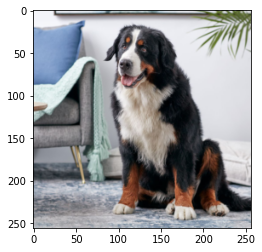

In [ ]:
for img, label in dloader:
  print(np.transpose(img[0], (1,2,0)).shape)
  print(img[0])
  plt.imshow((img[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
  plt.show()
  break

Pytorch default backend for images are Pillow, and when you use ToTensor()class, PyTorch automatically converts all images into [0,1] so no need to normalize the images here.


In [ ]:
len(image_datasets)

918

## Generate embeddings

In [ ]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

# Fetching Pretrained Resnet101 model

In [ ]:

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
# Select the desired layer
layer = model._modules.get('avgpool')
# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)

In [ ]:
outputs = []  # list of embeddings

model.eval() # Inference mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Generating Image Embaddings

In [ ]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for X, y in dloader:
    _ = model(X)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
len(outputs)

92

In [ ]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]
print(len(list_embeddings))

918


In [ ]:
#assert len(list_embeddings) == len(image_datasets)

In [ ]:
np.array(list_embeddings[0]).shape

(2048,)

In [ ]:
#Sending to Hub using API
!activeloop login -u shawmoon -p activeloop786

Successfully logged in to Activeloop.


In [ ]:
#Creating a New Hub folder
with hub.empty('./dog_deeplake') as ds:
    # Create the tensors 
    ds.create_tensor('images', htype = 'image', sample_compression = 'jpeg')
    ds.create_tensor('embeddings')

    # Add arbitrary metadata - Optional
    ds.info.update(description = 'Dog breeds embeddings dataset')
    ds.images.info.update(camera_type = 'SLR')
    
    # Iterate through the images and their corresponding embeddings, and append them to hub dataset
    for i in tqdm(range(len(image_datasets))):
      img = image_datasets[i][0].detach().numpy().transpose(1, 2, 0)
      img = img * 255 # images are normalized
      img = img.astype(np.uint8)
      ds.images.append(img)  # Append to Hub Dataset
      ds.embeddings.append(list_embeddings[i]) # Append to Hub Dataset
                

100%|██████████| 918/918 [00:29<00:00, 31.24it/s]


# Output of 10 nearest images of the class

Image:
(256, 256, 3)


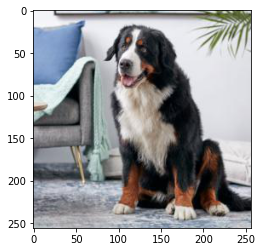

[0.67359871 0.18146648 0.43869931 0.08244503 0.25409773 0.6252296
 0.09838178 0.28386828 0.24715886 0.17143771]
Image:
(256, 256, 3)


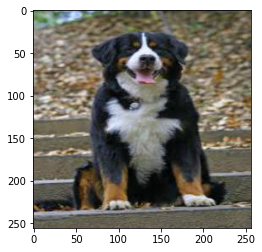

[0.78340036 0.20125844 1.25867951 0.0988321  0.38659444 0.42028978
 0.05361373 0.26565829 0.25380507 0.14855087]
Image:
(256, 256, 3)


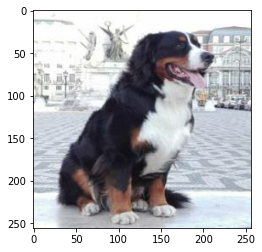

[0.62657118 0.20308086 1.02259243 0.13010356 0.16756114 0.70625854
 0.17028499 0.10572082 0.09015013 0.20954645]
Image:
(256, 256, 3)


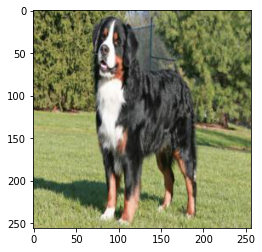

[0.32542405 0.12034763 1.09457982 0.16301185 0.26069397 0.88343388
 0.14608414 0.06343779 0.15057333 0.12605539]
Image:
(256, 256, 3)


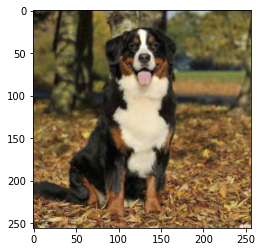

[0.60846835 0.1781911  1.04719448 0.09569643 0.07204882 0.48593032
 0.15144627 0.21415763 0.49948749 0.06957839]
Image:
(256, 256, 3)


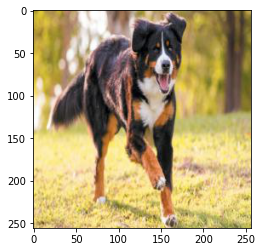

[0.63470316 0.18108642 0.66556692 0.07814986 0.1555471  0.5405342
 0.37592927 0.41271839 0.31419539 0.18579099]
Image:
(256, 256, 3)


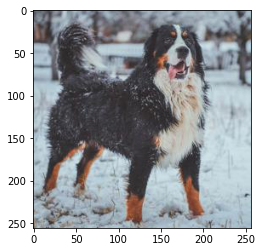

[0.15748164 0.74731475 1.11911976 0.08350298 0.39280742 0.69134372
 0.23614742 0.09624532 0.28806219 0.27461839]
Image:
(256, 256, 3)


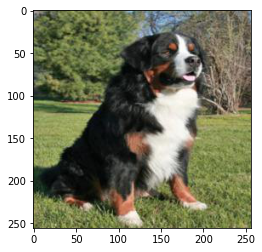

[0.58624059 0.16180101 0.7326014  0.06799694 0.48179066 0.51934218
 0.2601769  0.18119381 0.21300878 0.11284353]
Image:
(256, 256, 3)


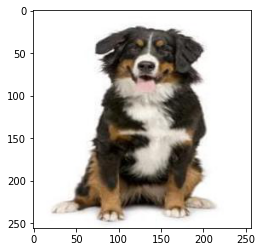

[0.75281036 0.26359332 0.21979117 0.07965694 0.55652118 0.30729714
 0.48187113 0.15953219 0.15535405 0.0790154 ]
Image:
(256, 256, 3)


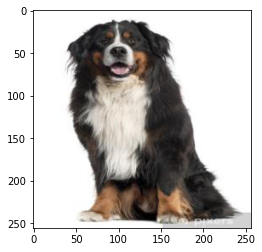

[0.58812726 0.11319336 0.48933965 0.05456294 0.32195193 0.76657403
 0.22817422 0.05496698 0.20588595 0.1097058 ]


In [ ]:
def show_image_in_ds(ds, idx=1):
    image = ds.images[idx].numpy()
    embedding = ds.embeddings[idx].numpy()
    print("Image:")
    print(image.shape)
    plt.imshow(image)
    plt.show()
    print(embedding[0:10]) # show only 10 first values of the image embedding

for i in range(10):
    show_image_in_ds(ds, i)

# Doing Simillar For ZFNET as well

ZFnet is simillar to Alexnet

In [ ]:
# # fetch pretrained model
# model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

As ZFnet pretrained not availble we needed to create the ZFNet Architecture

In [ ]:
#ZFNet Architechture

import torch.nn as nn
class ZFNet(nn.Module):
  
    def __init__(self, channels, class_count):
        super(ZFNet, self).__init__()
        self.channels = channels
        self.class_count = class_count

        self.conv_net = self.get_conv_net()
        self.fc_net = self.get_fc_net()

    def get_conv_net(self):
        layers = []

        # in_channels = self.channels, out_channels = 96
        # kernel_size = 7x7, stride = 2
        layer = nn.Conv2d(
            self.channels, 96, kernel_size=7, stride=2, padding=1)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        layers.append(nn.LocalResponseNorm(5))

        # in_channels = 96, out_channels = 256
        # kernel_size = 5x5, stride = 2
        layer = nn.Conv2d(96, 256, kernel_size=5, stride=2)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        layers.append(nn.LocalResponseNorm(5))

        # in_channels = 256, out_channels = 384
        # kernel_size = 3x3, stride = 1
        layer = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.ReLU(inplace=True))

        # in_channels = 384, out_channels = 384
        # kernel_size = 3x3, stride = 1
        layer = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.ReLU(inplace=True))

        # in_channels = 384, out_channels = 256
        # kernel_size = 3x3, stride = 1
        layer = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.MaxPool2d(kernel_size=3, stride=2))

        return nn.Sequential(*layers)

    def get_fc_net(self):
        layers = []

        # in_channels = 9216 -> output of self.conv_net
        # out_channels = 4096
        layer = nn.Linear(9216, 4096)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.Dropout())

        # in_channels = 4096
        # out_channels = self.class_count
        layer = nn.Linear(4096, self.class_count)
        nn.init.normal_(layer.weight, mean=0.0, std=0.02)
        nn.init.constant_(layer.bias, 0.0)
        layers.append(layer)
        layers.append(nn.Dropout())

        return nn.Sequential(*layers)

    def forward(self, x):
        y = self.conv_net(x)
        y = y.view(-1, 9216)
        y = self.fc_net(y)
        return y